<a href="https://colab.research.google.com/github/tmogoa/compilerconstruction/blob/main/A_Labactivities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Stream ***Group members: 116814, 102401, 100226, 121544, 110195***


# **Lab 1: Flex, Bison, Lex, Yacc**

### Flex

Writing a compiler in a high-level programming language is a very complex task. But this can be achieved with the help of compiler writing tools such as **Flex**. 
**Flex** is a ***fast lexical analyser generator***---a tool for for programming that recognizes ***lexical patterns*** in the **input** with the help of ***Flex specifications***.
Flex specification contains two parts: (i) **patterns** and (ii) **corresponding action**. 

When you write a Flex specification, you create a set of **patterns** which the **lexer** matches against the **input**. Each time one of the **patterns** matches, the **corresponding action** part is invoked (which is a C code). In this way, a lex program divides the **input** into **tokens**.   
(Das, 2007)


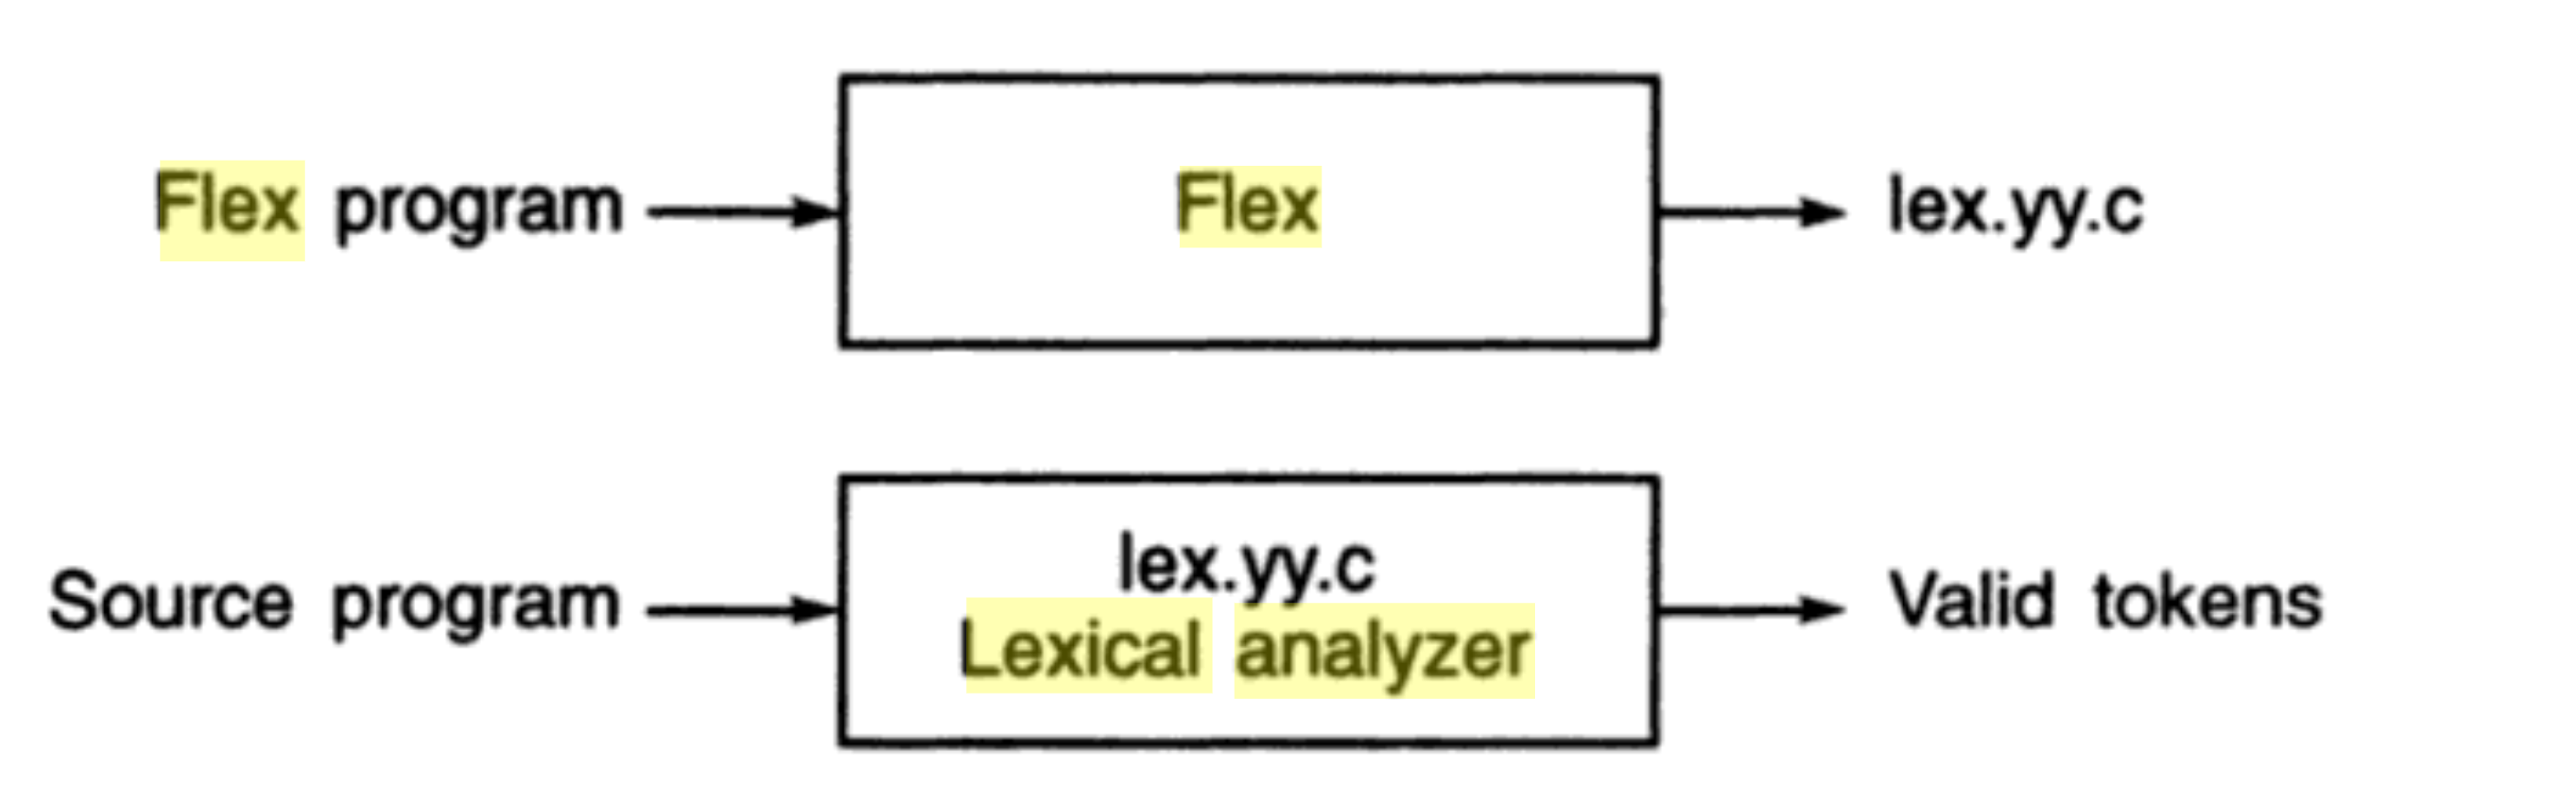

**Phases of a lexiacal Analyser (Das, 2007)**


Any Flex Program consists of three sectionsseperated by a line with just **%%** in it:


Definition section

%%

Rules Section

%%

User Auxilary Section








**Example Code: Count the number of characters in a string**


```
# This is formatted as code
/*** Definition Section has one variable
which can be accessed inside yylex()
and main() ***/
%{
int count = 0;
%}

/*** Rule Section has three rules, first rule
matches with capital letters, second rule
matches with any character except newline and
third rule does not take input after the enter***/
%%
[A-Z] {printf("%s capital letter\n", yytext);
	count++;}
.	 {printf("%s not a capital letter\n", yytext);}
\n {return 0;}
%%

/*** Code Section prints the number of
capital letter present in the given input***/
int yywrap(){}
int main(){

// Explanation:
// yywrap() - wraps the above rule section
/* yyin - takes the file pointer
		which contains the input*/
/* yylex() - this is the main flex function
		which runs the Rule Section*/
// yytext is the text in the buffer

// Uncomment the lines below
// to take input from file
// FILE *fp;
// char filename[50];
// printf("Enter the filename: \n");
// scanf("%s",filename);
// fp = fopen(filename,"r");
// yyin = fp;

yylex();
printf("\nNumber of Capital letters "
	"in the given input - %d\n", count);

return 0;
}

```



**Output**

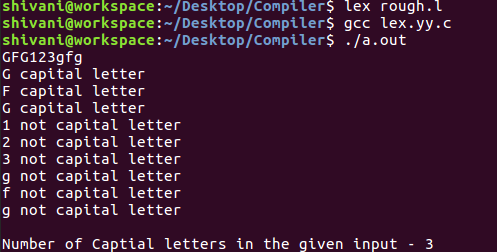


### Bison

Bison is a general purpose parser(syntatic analyzer) generator which is published as part of the GNU project. A syntax analyzer does the work of checking whether the stream of classified words produced by the scanner is a valid sentence is the programming langauge(Cooper & Torczon, 2011). Bison converts an annotated context-free grammar into a LR of generalized LR parser (GNU, 2021). *'LR'* refers to Left-to-right scanning Right-most derivation in reverse (Javatpoint, 2022). Additionally Bison is compatible with YACC, that is all correcly written YACC grammars can work with Bison (GNU, 2021). Bison is the GNU equivalent of YACC (MVPS.net, 2019).

The diagram below by Gao(2022) shows summary of how Bison works, how a parser is generated and how it is then compiled by a C compiler afterwhich in can be use to generate syntax trees.

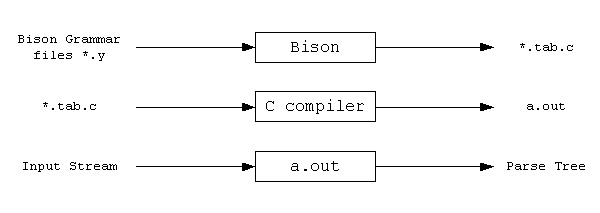

Below is a code snippet of a simple calculator program (Levine, 2009):

    /* simplest version of calculator */
    %{
    #include <stdio.h>
    %}

    /* declare tokens */
    %token NUMBER
    %token ADD SUB MUL DIV ABS
    %token EOL

    %%

    calclist: /* nothing */                       matches at beginning of input
    | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
    ;

    exp: factor       default $$ = $1 
    | exp ADD factor { $$ = $1 + $3; }
    | exp SUB factor { $$ = $1 - $3; }
    ;

    factor: term       default $$ = $1 
    | factor MUL term { $$ = $1 * $3; }
    | factor DIV term { $$ = $1 / $3; }
    ;

    term: NUMBER  default $$ = $1 
    | ABS term   { $$ = $2 >= 0? $2 : - $2; }
    ;
    %%
    main(int argc, char **argv)
    {
      yyparse();
    }

    yyerror(char *s)
    {
      fprintf(stderr, "error: %s\n", s);
    }


### YACC

**YACC**
Yet Another Compiler Compiler is a syntax analyzer (parser) generator. The input to YACC is a Context Free Grammar(CFG) and the output is the code of the parser. YACC is used to build lexical analyzers.
Given grammar rules:


*  S->E$

*   E->E+T

*   ->T

*  T->T*F
*   ->F


*   F->(E)


*   ->-F


*   ->NUM

The grammar rules above are for building a simple calculator.The YACC parser works from bottom to top and is accomplished by looking for segments that look like the right hand side of a particular production and reducing it back. So for example given the arithmetic( -3*4+5$)$ represents the end of input.
The following steps are to be followed when using YACC parser:










*   We begin from the -Ve symbol. YACC has a stack therefore the negative  symbol is shifted onto the stack then the look ahead token tells it what to do 

*    It shifts to 3 and adds it to the stack and now the look ahead token is the asterix.It will look at three and realize that it is a NUM and corresponds to production rule 8 and chooses to do a reduction as 3 matches the right hand ride production of rule 8 in which F->3

*   In the - section the - symbol is the same as -F
*  The production F can be reduced further into a T using production 3 and upon seeing the asterix it shifts the look ahead token to the number 4.
*  On the number 4 it executes a reduction using production rule 8.Therefore the production T*F can be replaced by the left hand side production T.

*  Production T can be extrapolated from the production rule 2 to give us E. Then the stack is shifted right to capture the next two operands + and 5


*   5 is going to get reduced based on production 7 to give us an F and based on production 3 F is going to be reduced back to a T.And finally to conclude we will use production rule 1 to reduce the production E$ to give us


*   
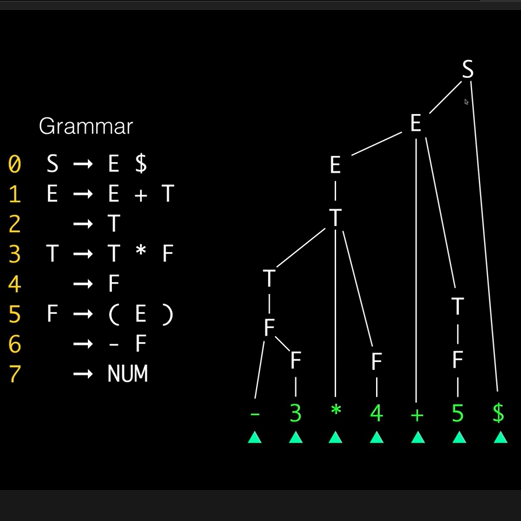

In [ ]:
%{
#include <stdio.h>
#include<stdlib.h>

extern int yylex();
Void yyerror(char *msg);
%}
%union{float f}
%token <f>NUM
%type<f> ETF
%%
S:E //no need for dollar sign as its immutable {printf(“%f\n”,$1);}
  ;
E:E ’+’ T  {$$=$1+$3;}
   |E ‘-’T    {$$=$1-$3;}
   |T          {$$=$1;}
   ;
T:T*F       {$$=$1*$3;}
  |E ‘/’T     {$$=$1/$3;}
  |F           {$$=$1}
  ;
F:’(‘E’)’    {$$=$2}
  |’-’F       {$$=-$1}
  |NUM    {$$=$1}
  ;

Void yyerror(char *msg){
    fprintf(stderr,”%s\n”,msg);
            exit(1);
}
Int main(){
     yyparse();
    return(0);
}

%%

On to the lexical analyzer

%{
#include <stdio.h>
#include<stdlib.h>
#include<y.tab.h> // generated via yacc -d


%}
%option noyywrap
%%
[0-9]+(\.[0-9]+)?([eE][0-9]+)?  {yyval.f = ato(yytext);return NUM}
[-+()*/]                    {return yytext[0];}
[\t\f\v\n]             {;}
%%


### Lex

Lex is a tool or software that automatically creates a lexical analyser (finite Automata). It takes LEX source program as input and produces lexical analyser as the output. Lexical analyser converts input string from the user, into tokens, as the output.

Lex is a program generator purposed for lexical processing of character input/output stream. In a program with an input-output structure, two tasks repeat multiple times. It can divide the input-output into meaningful units and then discovering the relationships among the units for C program (the units are variable names, constants, and strings) (the units are variable names, constants, and strings). Lexical analyzer, or LEXING, is the term for this grouping of words into units (referred to as tokens). By using a set of token descriptions as input, LEX creates a routine known as a lexical analyzer, also known as an LEXER or Scanner.

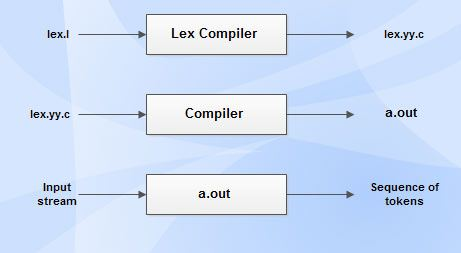



*   lex.l is an input file written in a language which specifies the creation of the lexical analyser. The lex compiler converts lex.l to a C program known as lex.yy.c

*   lex.yy.c is compiled by the C compiler to a file called a.out.

*   The output of the C compiler is the working lexical analyser which takes the input string and converts them into a series of tokens.

*   yylval is a global variable which is provided by lexical analyser and parser to return the name and an attribute value of the token. The attribute value can be numeric code, pointer to symbol table or null.


**Structure of Lex Programs**
Lex program will be in following form

declarations

%%

translation rules

%%

auxiliary functions


***Declarations*** 
This section includes declaration of variables, constants and regular definitions.

***Translation rules*** 
It contains regular expressions and code segments.

Form : Pattern {Action}

Pattern is a regular expression or regular definition.

Action refers to segments of code.

***Auxiliary functions*** 
This section holds additional functions which are used in actions. These functions are compiled separately and loaded with lexical analyzer.

Lexical analyzer produced by lex starts its process by reading one character at a time until a valid match for a pattern is found.

Once a match is found, the associated action takes place to produce token.

The token is then given to parser for further processing.



In [ ]:
//Code Snippet - Counting total number of tokens


%{

  int n = 0 ;

%}

// rule section

%%

//count number of keywords

"while"|"if"|"else" {n++;printf("\t keywords : %s", yytext);}


// count number of keywords

"int"|"float" {n++;printf("\t keywords : %s", yytext);}


// count number of identifiers

[a-zA-Z_][a-zA-Z0-9_]* {n++;printf("\t identifier : %s", yytext);}


// count number of operators

"<="|"=="|"="|"++"|"-"|"*"|"+" {n++;printf("\t operator : %s", yytext);}


// count number of separators

[(){}|, ;] {n++;printf("\t separator : %s", yytext);}


// count number of floats

[0-9]*"."[0-9]+ {n++;printf("\t float : %s", yytext);}


// count number of integers

[0-9]+ {n++;printf("\t integer : %s", yytext);}						


.         ;

%%


int main()

{
	
	yylex();
	
	printf("\n total no. of token = %d\n", n);
	
}

**Results**

Input: int p=0, d=1, c=2;

Output: total no. of tokens = 13

###***References***

1. https://www.gnu.org/software/bison/manual/bison.html#Introduction

2. https://www.mvps.net/docs/gnu-flex-and-gnu-bison/?gclid=Cj0KCQjw08aYBhDlARIsAA_gb0ffbLtKYZnJzLZK2e-h5vYq_KEuofSSnNiZMAKjXUazI5KPEOghmqoaAkNUEALw_wcB

3. https://www.javatpoint.com/lr-parser

4. Gao Lan, http://alumni.cs.ucr.edu/~lgao/teaching/bison.html

5. Levine, J. (2009). Flex & Bison: Text Processing Tools. " O'Reilly Media, Inc.".

6. Das, V. V. (2007). Compiler Design using FLEX and YACC. PHI Learning Pvt. Ltd..
7. https://ecomputernotes.com/compiler-design/lex-use-of-lex#Use_of_Lex
8. https://www.tutorialspoint.com/what-is-lex
9. Cooper, K. D., & Torczon, L. (2011). Engineering a compiler. Elsevier.

# **Lab 2: NFA TO DFA and Flex Lexical Analyzer**

### NFA TO DFA

### First Example

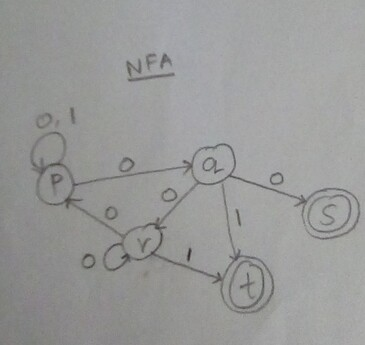

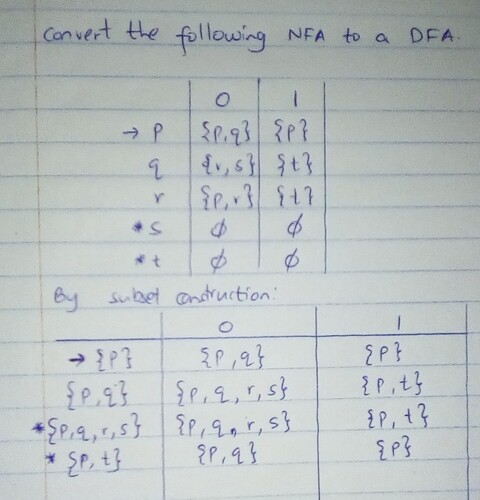

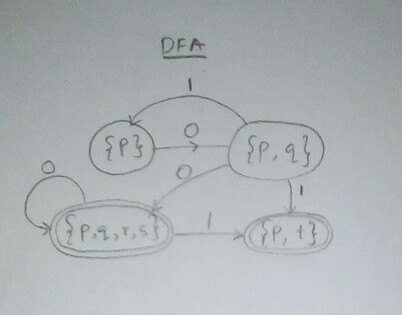

###Second Example

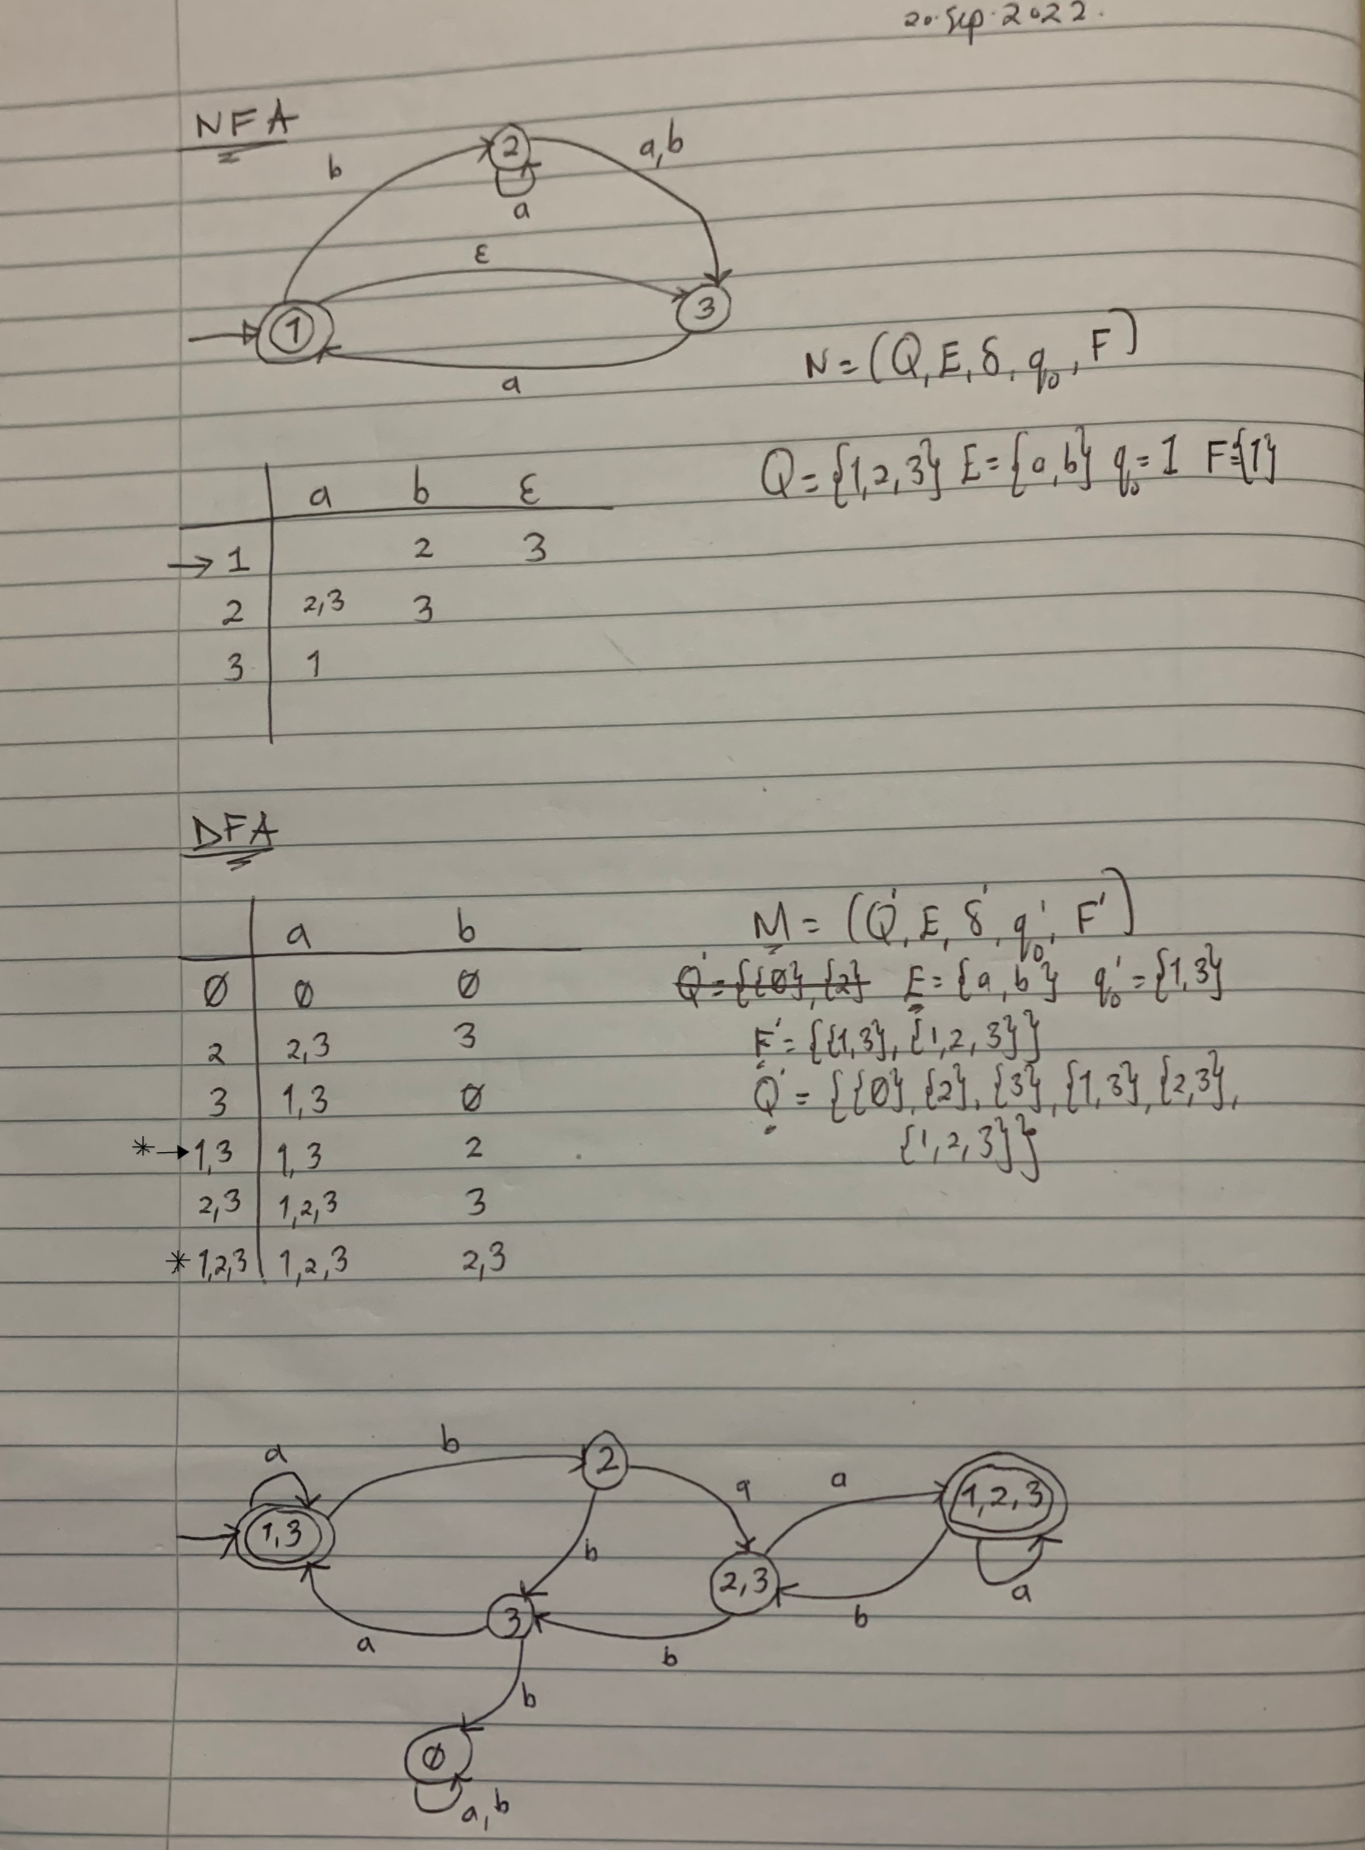

##Lexical Analyser - Password Acceptor

This program is set to take a string as an input. This string is treated as a password and undergoes defined checks to ensure the criteria is met to be tagged as a valid password. The criteria are:

1. The password should not have any symbols
2. The password should have atleast 1 Uppercase Alphabet
3. The password should have atleast 1 Lowercase Alphabet
4. The password should have atleast 1 Number
5. The password should have atleast length of 8 characters

In [ ]:
%{
int symb = 0;
int U_case = 0;
int L_case = 0;
int num = 0;
int len = 0;

%}
 
/*** Rule Section has five rules based on the following criteria that a password string must meet: 
The password should not have any symbols -> first rule matches with symbols using octal value of ASCII code and increases symbol counter and length counter , 
The password should have atleast 1 Uppercase Alphabet -> second rule matches with Uppercase Alphabets and increases the Uppercase counter and length counter,
The password should have atleast 1 Lowercase Alphabet -> third rule matches with Lowercase Alphabets and increases the Lowercase counter and length counter,
The password should have atleast 1 Number -> fourth rule matches with numbers and increases number counter and length counter
The password should have atleast length of 8 characters -> length counter keeps track of each character captured
fifth rule returns 0 when a new line is captured to ensure password is a single line string***/
%%
[\040-\057\072-\100\133-\140\173-\176] {symb++; len++;}
[A-Z] {U_case++; len++;}
[a-z] {L_case++; len++;}
[0-9] {num++; len++;}
\n {return 0;}

%%
 
/*** Code Section prints whether the password is valid or not based on above listed criteria***/
int yywrap(){}
int main(){
printf("\n\n\n****************PASSWORD ACCEPTOR****************\n\n\n");
printf("A Valid Password must match the following criteria:\n\n");
printf("1. The password should not have any symbols\n");
printf("2. The password should have atleast 1 Uppercase Alphabet\n");
printf("3. The password should have atleast 1 Lowercase Alphabet\n");
printf("4. The password should have atleast 1 Number\n");
printf("5. The password should have atleast length of 8 characters\n\n");
printf("Input Password: ");
  
yylex();

/*** This if statement checks if our criteria is met by the input string i.e 
there is no symbol -> symb counter should be 0
there is atleast 1 Lowercase alphabet -> L_case >=1
there is atleast 1 Uppercase alphabet -> U_case >=1
there is atleast 1 number -> num >=1
the length of the password is atleast 8 characters -> len >=8***/
if(symb==0 && L_case>=1 && U_case>=1 && num>=1 && len>=8){
      printf("\nThis password is Valid!\n");
 
}
else{
      printf("\nThis password in NOT Valid!\n");
}

 
return 0;
}


# **Lab 3 - Creating Our Own Flex File**

**Lab was done as Lab 2. Thank you.**

# **Lab 4 - Understanding Predictive Parsing**

**1. Using an example or illustration, explain what is predictive parsing.**

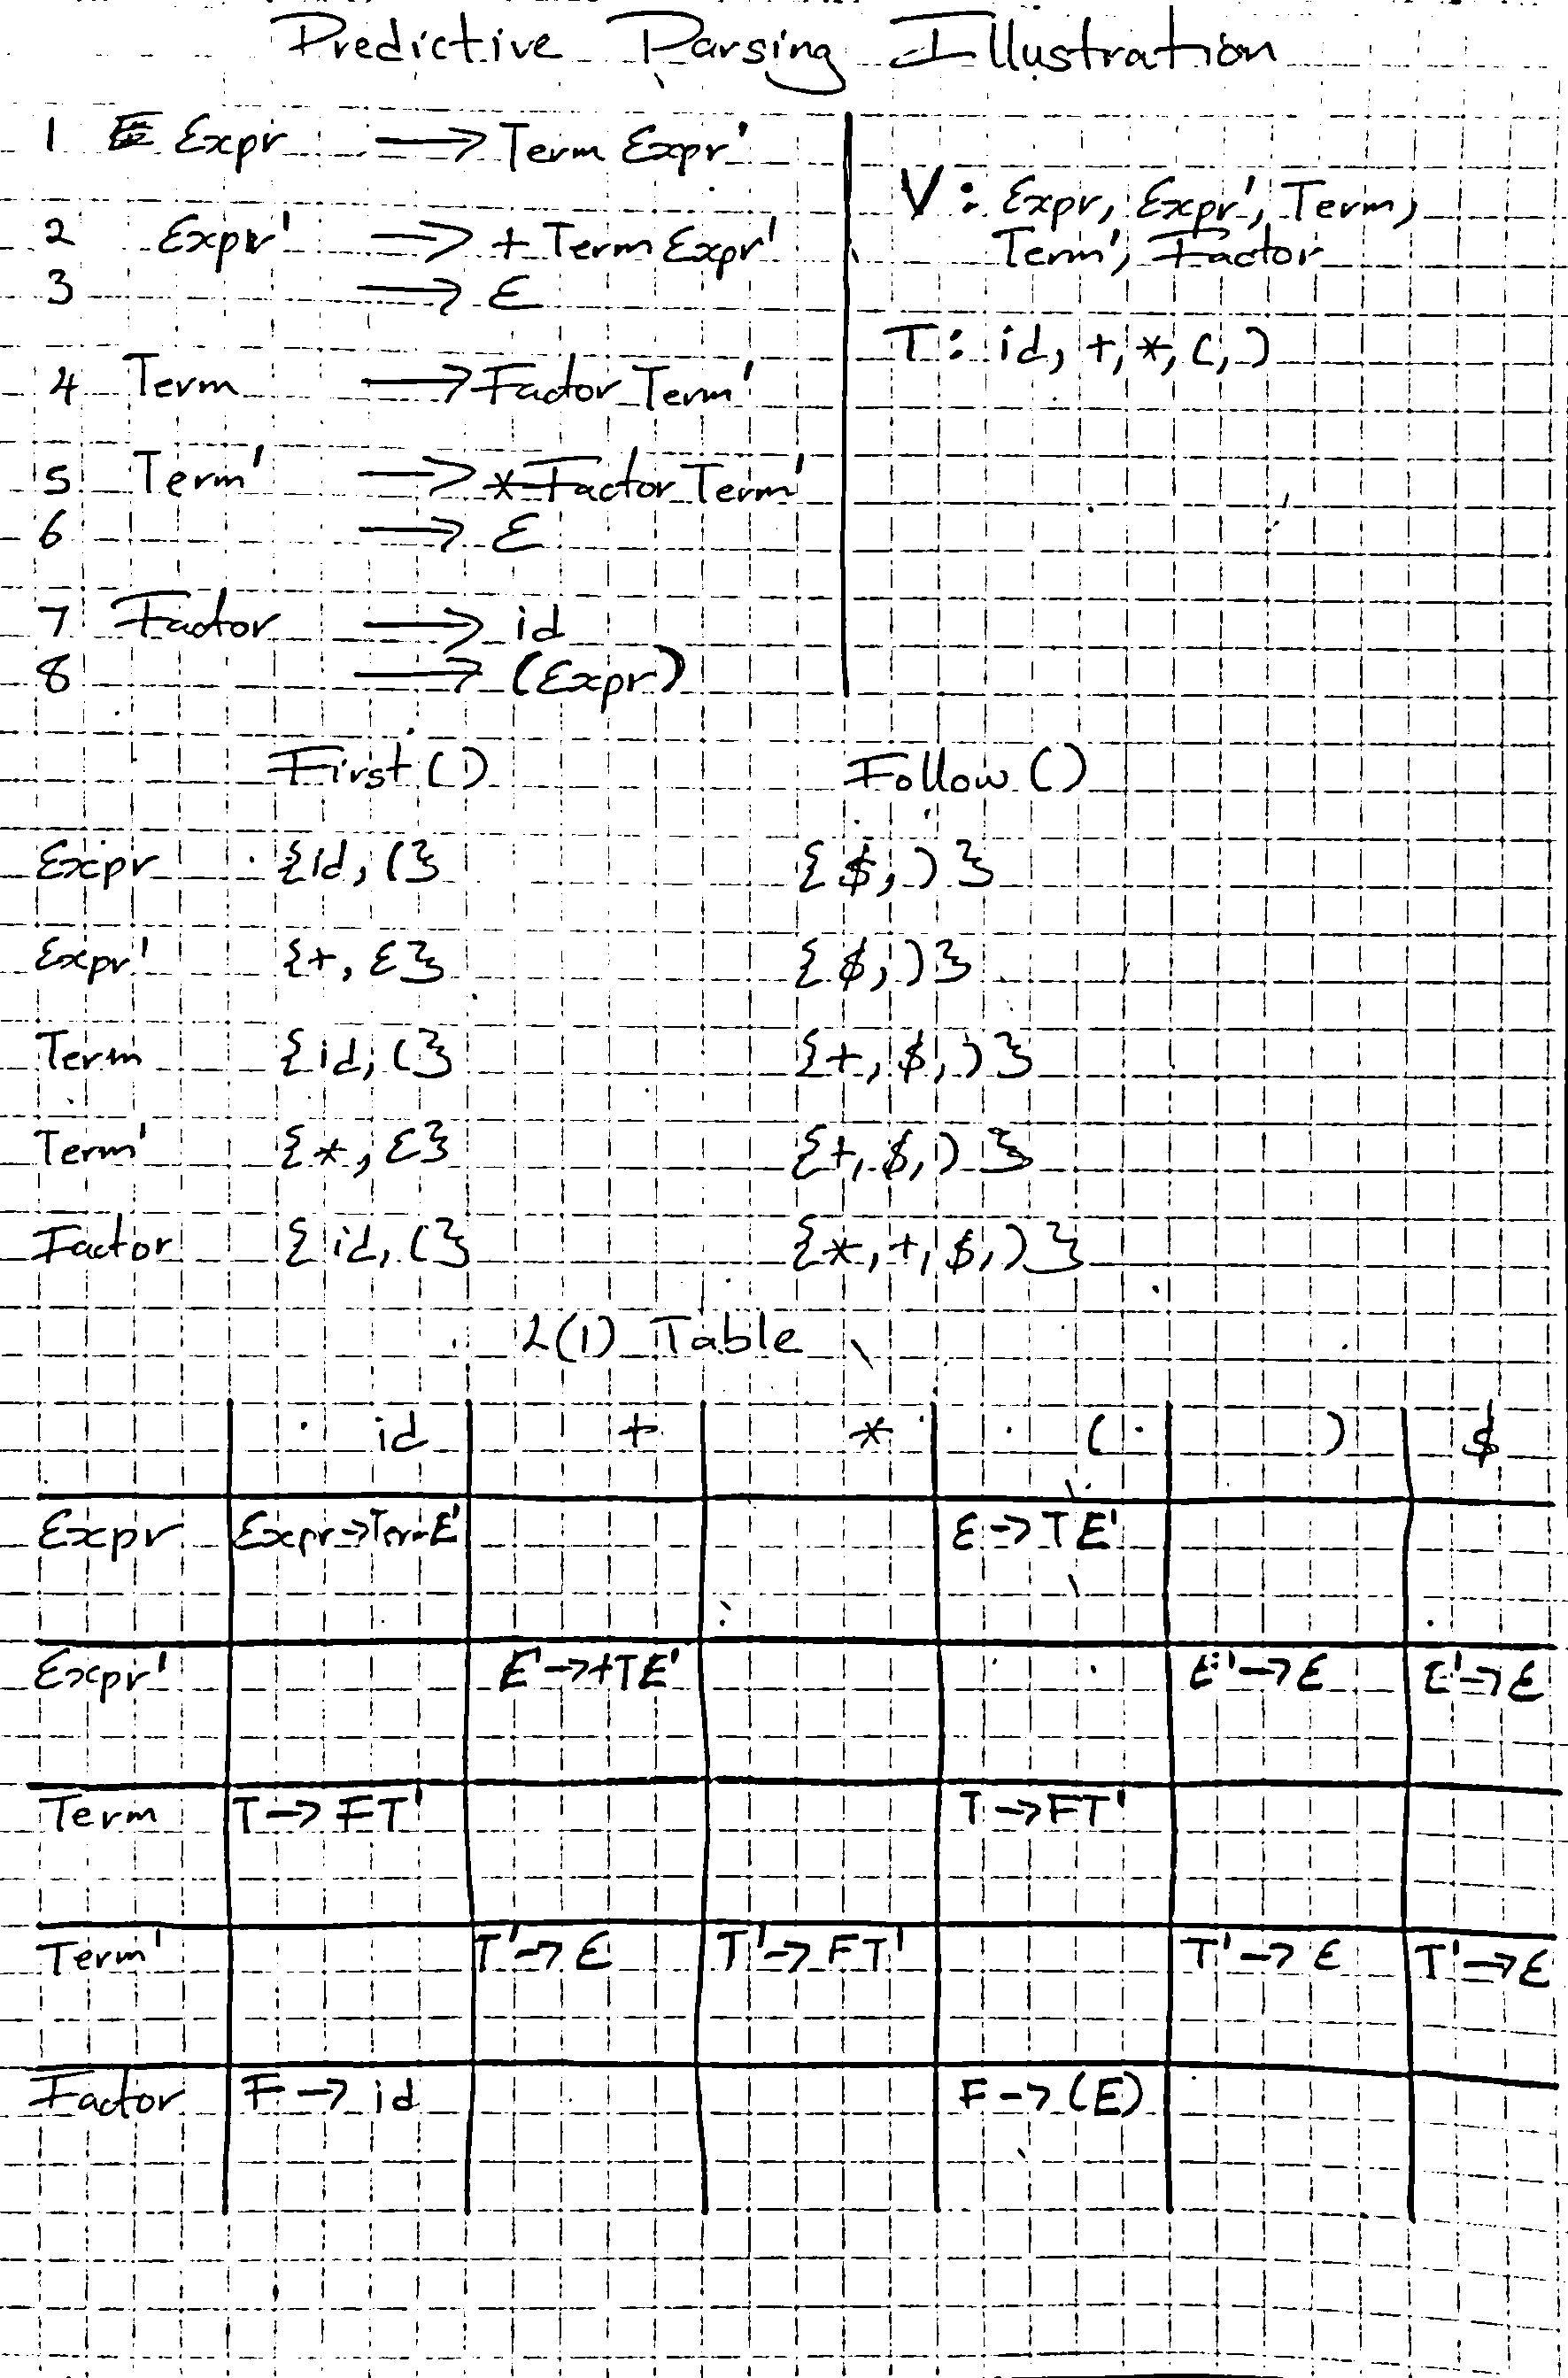
The basic idea in predictive parsing is:
Given: A --> a|B, the parser should be able to choose between a and B.


**2. As an extension to question 1,**

**a. What is LL (1) parsing?**

LL(1) parsing is a top-down parsing technique used in the compiler design's syntax analysis phase. The input string, a stack, a parsing table for the provided grammar, and a parser are necessary elements for LL(1) parsing.

Example:

Let given grammar is G = (V, T, S, P)
where V-variable symbol set, T-terminal symbol set, S- start symbol, P- production set. 

**LL(1) Parser algorithm:**

**Input** 
1. stack = S  //stack initially contains only S.
2. input string = w\$ (where S is the start symbol of grammar, w is given string, and $ is used for the end of string).
3. PT is a parsing table of given grammar in the form of a matrix or 2D array.

**Output**
Determines that given string can be produced by given grammar(parsing table) or not, if not then it produces an error.


In [ ]:
while(stack is not empty) {

       // initially it is S
     A = top symbol of stack;  

       //initially it is first symbol in string, it can be $ also
     r = next input symbol of given string; 
     if (A∈T or A==$) {
         if(A==r){
             pop A from stack;
             remove r from input;
         }
         else
             ERROR();
     }
     else if (A∈V) {
         if(PT[A,r]= A⇢B1B2....Bk) {
             pop A from stack;
             
                // B1 on top of stack at final of this step
             push Bk,Bk-1......B1 on stack  
         }
         else if (PT[A,r] = error())
             error();
     }
 } 
// if parser terminate without error() 
// then given string can generated by given parsing table.



**b. Why do we get the First () and Follow () i.e. what do these two functions really represent?**

    					First()
We have first() in order to know what is the first character of the string when a production rule is applied and comparing it to the current character in the input string it sees.it can wisely take decision on which production rule to apply.

for example given:

S -> cAd

A -> bc|a

And the input string is “cad”.

It would have ignored the production rule A->bc (because 'b' is the first character of the string produced by this production rule, not 'a'), and used the production rule A->a (because 'a' is the first character of the string produced by this production rule, and is identical to the current character of the input string, which is also 'a'), if it had known that after reading character 'c' in the input string and applying S->cAd, the next character in the production rule.

 					Follow()
Consider:

 A -> aBb

 B -> c | ε

And suppose the input string is “ab” to parse. a being the first input the rule "A->aBb
The parser now looks for the second character of the input string, which is b. Since B is the Non-Terminal, no string derivable from B may have b as the initial character.However, the Grammar does include a production rule B ->ε; if this is used, B will disappear and the parser will get the input "ab," as is seen below. However, the parser may only use it if it is aware that the character that follows B in the production rule corresponds to the currently input character.

In RHS of A -> aBb, b follows Non-Terminal B, i.e. FOLLOW(B) = {b}, and the current input character read is also b. Hence the parser applies this rule. And it is able to get the string “ab” from the given grammar.

     	  A                  A
        /  |  \              / \                                                
      a    B    b    =>     a   b       
           |
           ε 

    
(Bajpai, 2021)

**3**. **Are there any unique attributes associated with Top-Down parsing?**

    Top-down parsing by its very nature attempts to parse strings by systematically extending the parse tree from the root using the grammar's production rules unitl the leaves of the parse tree match the clasified words returned by the scanner (Cooper & Torczon, 2011). This can be said to be its first unique attribute.

    Secondly, another unique attribute associated with top-down parsing are the challenges that if faces. Firstly, top-down parsing faces the problem of needing to backtrack. In the process of derivation the parser needs to pick a suitable production rule to extend the parse tree. For a grammar that is not backtrack-free, the parser may pick the wrong rule resulting in the derivation of a sentence not matching what was returned by the scanner, hence the parser needs to backtrack and pick another rule and re-attempt derivation. This continues till the words returned by the scanner are derived or all the possibly applicable rules have been used and hence a syntax error is returned since the sentence may be said to be invalid. This problem is solved through predictive parsing where the parser by means of lookahead techniques choose a suitable rule for expansion hence eliminating the need to backtrack (Cooper & Torczon, 2011).

    Top-down parsing also faces the problem of left recursion. Left recursion occurs where a rule's right hand side's first symbol is the same symbol as the symbol on the left hand side(check Figure 1 below) hence a parser ends up indefintely expanding the first symbol of the RHS with the whole of the RHS of the rule. 
    
    **Figure 1**

    A --> Ax | y
    
    Therefore the parsing is stuck at that point. The solution to this problem entails restructuring the production rules to convert left recursion to right recursion (Cooper & Torczon, 2011), like so:

    **Figure 2**
    
    A --> yA'

    A' --> xA' | ε



**References**
1. Cooper, K. D., & Torczon, L. (2011). Engineering a compiler. Elsevier.
2. Bajpai. (2021, November 16). Why FIRST and FOLLOW in Compiler Design? Geeks for Geeks. Retrieved October 18, 2022, from https://www.geeksforgeeks.org/why-first-and-follow-in-compiler-design/
3. https://www.geeksforgeeks.org/ll1-parsing-algorithm/

# **Lab(Week of 17th)**

1. **Review what syntax analysis is and in a few words, describe what this phase of compiler construction entails.**

    Syntax analysis refers to the process by which a given sequences of lexemes are classified as valid sentences or invalid sentences by a parser with respect to a given context free grammar.

    In this phase the parser attempts to derive the given sequence of lexemes from the start symbol of a grammar. If the derivation matches the sequence of lexemes then the said sequence is declared valid or invalid otherwise. The process of derivation can take many forms but generally involves the use of grammar's production rules. In top down parsing, a parser starts with the start symbol and consistently replaces a given nonterminal, usually the leftmost with the right hand side of a production whose lefthand side is the said terminal. While in bottom up parsing, a parser attempts to reduce part of the sequence of lexemes to a non-terminal using the production rules.

2. **Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple syntax analyzer. Consult the web, show and explain the simple codes that you find.**
    
    We attempted to write a simple specification for a if-else statement parser. The specification files are shown below:

###**Flex specification file: ifelse.l**

In [ ]:
%{  
	#include"ifelse.tab.h"
	extern int yylval;
%}

%%
 /* RULES SECTION */
"if"	{return IF;}
"else"	{return ELSE;}
"=" {return EQU;}
"++" {return INC;}  
"--" {return DEC;}
 /* RELATIONAL OPERATIONS: */
"<=" {return LE;}  
">=" {return GE;}  
">" {return GT;}  
"<" {return LT;}  
"!=" {return NE;}    
"==" {return EQ;}  
 /* --------------------- */
"(" {return OPBR;}
")" {return CLBR;}
"{"	{return OBRACES;}
"}"	{return CBRACES;}
";" {return SEMIC;}
 /* Convert string to integer and store it */
[0-9]+ {yylval=atoi(yytext);return NUM;}
 /* yytext[0] holds the first character of the text matched by the current token */ 
[a-zA-Z]+ {yylval=yytext[0];return ID;} 
%%

The flex specification file defines the lexical analyzer. The rules of the lexical anaylzer classify various characters or sequences of characters into their respective syntactic categories such as "if", "else" statement, comparison operates, brackets and braces.

###**Bison specification file: ifelse.y**

In [ ]:
%{
#include<stdio.h>
#include<stdlib.h>
// To avoid warning, we include below definitions:
int yylex();
void yyerror(const char *s);
%}

%token IF ELSE NUM OPBR CLBR OBRACES CBRACES INC DEC ID SEMIC GE NE LT GT LE EQ EQU 
// Operator precedence and associativity:
%right '=' 
%left GE NE LT GT LE EQ  
%left '+' '-'  
%left '*' '/'  
%right '^'   

%%
// RULES SECTION: 
S : ST { printf("\nACCEPTED\n"); exit(0); }

ST : IF OPBR Expr2 CLBR OBRACES Expr1 SEMIC CBRACES
| IF OPBR Expr2 CLBR OBRACES Expr1 SEMIC CBRACES ELSE OBRACES Expr1 SEMIC CBRACES

Expr1 : ID EQU ID
| ID EQU NUM
| Expr3

Expr2 : ID RELOP ID
| ID RELOP NUM

Expr3 : ID INC
| ID DEC

RELOP : LT  
| GT  
| EQ  
| LE  
| GE  
| NE 
;

%%

#include"lex.yy.c"  
int main() {   
	yyparse();  
	return yylex();  
}  

void yyerror(const char *s){ printf("\nERROR\n"); }
int yywrap(){ return 1; }

The Bison specification defines the parser whose rules are defined in the fashion of the production rules of a context free grammar. The rules basically define the structure of valid if and if-else sentences. The parser when compiled includes the lex.yy.c file which implements the lexical analyzer. The lexical analyzer passess its classified lexemes to the parser.

To compile and run the parser we run the following commands:

    $ flex ifelse.l # produces lex.yy.c
    $ bison -d ifelse.y # produces ifelse.tab.c and ifelse.tab.h 
    $ gcc ifelse.tab.c # produces a.out which is executable
    $ ./a.out # run the exceutable

The parser accepts this sentence:

    if(a > 1){a++;}else{a--;}

But the parser throws an error for the below sentence since the expression for the 'if' is an assignment, which is a structure not permitted by the grammar.

    if(a = 10){a++;}else{a--;}

# **Lab (Week of 24th)**

Compiler construction is hard. Hence it is broken down into three phases, front-end, middle-end and backend, to reduce complexity. The first of these stages is the front-end which takes a programmer's source program code as input and produces an intermediate representation which can be passed as input to the middle-end or backend of the compiler. If the front end detects that the source program is syntactically ill-formed or semantically unsound, it throws an error to inform the user to take corrective action.

The front end of compiler is further broken down into four phases namely: lexical analysis, syntactical analysis, semantic analysis and intermediate code generation.

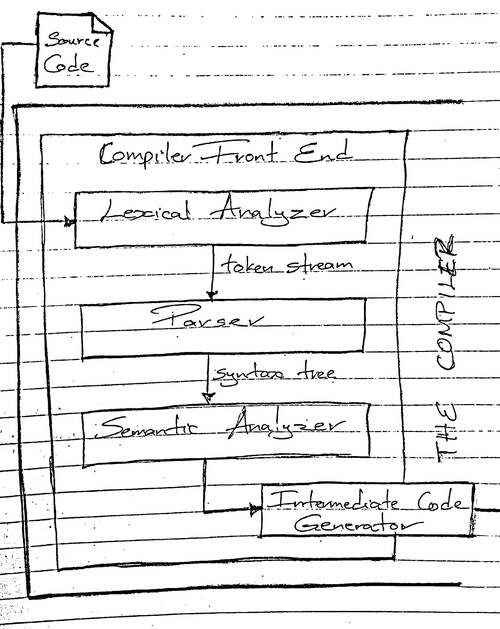

### **Lexical Analysis**

In this phase the source program is broken down into a stream of tokens(lexemes) which consist of token name and attribute value e.g \<id,1\>. The token name is a symbol that is used during syntax analysis and the attribute value points to an entry in the symbol table for respective token. The streams of token are the input to the next phase which is syntactical analysis.
Using the example program code, `x + 2 * y`, the lexical analyzer would break it down in to the following:

*   <id, x>
*   <op, +>
*   <num, 2>
*   <id, y>





### **Syntax Analysis**

In this phase, the stream of lexemes produced by the lexical analyzer(lexer) is checked for syntactical correctness. To do this the syntax analyzer(parser) attempts to derive a parse tree whose leaves correspond to the stream of tokens. If the parse tree is successfully generated then the source program is syntactically correct otherwise an error is thrown. The syntax rules are defined by grammar.

Consider the following the following grammar

`Expr --> Expr op Expr | num | id`

`op --> + | - | * | /`

Taking the example source program x + 2 * y, the parser derives the following parse tree.

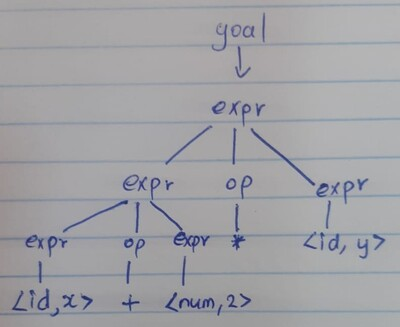

In the parsing process, the parser must choose the correct production for each derivation step without the need to backtrack. To achieve that the LL(1) algorithm for top-down parsing or LR(1) algorithm for bottom-up parsing may be used.

The output of this phase is a syntax tree which is the input to semantic analysis.

### **Semantic Analysis**

This stage checks what is not easily implementable with syntax analysis. In semantic analysis, type checking is done, where operand and expression are evaluated to ensure that the types are legally used and hence are meaningful. Additionally, name binding is carried out to ensure that identifiers are not used before they are defined. Lexical scoping also falls under name binding where the visibility of functions, variables and other constructs are scrutinized. Moreover, the semantic analyser also carries out flow checking for example to ensure that functions always return their defined type in strictly typed languages.

Semantic analysis makes use of a CFG together with a set of semantic rules where grammar symbols have associated attributes. For the example code `x + 2 * y` the semantic analyzer produces the annotated parse tree below:

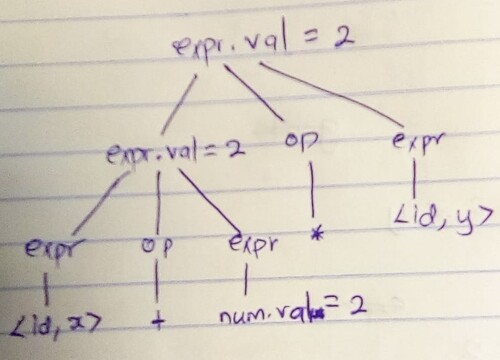

### **Intermediate Code Generation**

This phase produces the final output of the front which is called intermediate representation, that then becomes the input to the backend. Intermediate representation commonly takes two forms: an abstract syntax tree or a linear representation such as a three-address code. For the program example code `x + 2 * y`, the IR generator produces the following IR:

```
t1 = x
t2 = 2
t3 = t1 + t2
t4 = y
t5 = t3 * t4
```



# **Lab(Week of 31st)**

1. Write the three address code (TAC) of the following:

a. Any if-statment of your choice

	 if(i <= j + k)
 			i = i - k;
	 k = j * k;



		t1 = j + k;
		t2 = i <= t1;
		if t2 goto L1;
	L1: t3 = i - k;
		i = t3;
		t4 = j * k;
		k = t4;
	
 

	
	
b. Any for-loop of your choice

	for(i = 1; i <= 20; i++){
		x = y + z
	}

	1. i = 1
	2. if i <= 20, go to (7)
	3. go to EXIT_LOOP
	4. t1 = i + 1
	5. i = t1
	6. go to (2)
	7. t2 = y + z
	8. x = t2
	9. go to (4)



c. Any while-loop of your choice

	m = 0
	do
	{
    if (a < b) then
    n++;
    else
    n–;
    m++;
	} while (m < 5) 

	1. m = 0
	2. if (a < b) goto (4)
	3. goto (7)
	4. T1 = n + 1
	5. n = T1
	6. goto (9)
	7. T2 = n – 1
	8. n = T2
	9. T3 = m + 1
	10. m = T3
	11. if (m < 5) goto (2)

###2. Write the triple implmenetation of one of the TAC's in question 1 above.

Consider the following code:

    if(i <= j + k)
         i = i - k;
    k = j * k;


Consider the three address code for the same:

        t1 = j + k;
        t2 = i <= t1;
        if t2 goto L1;
    L1: t3 = i - k;
        i = t3;
        t4 = j * k;
        k = t4;

The triple implementation of the if statement above is as below. In this case, the target label of where the execution should jump to is stored as the result for the for the record `(1)` where `i` is less than or equal to `j + k` which is `(0)`, the target label of the start of the if block is stored in the pointer `(0)`. Therefor the value stored in `(1)` will be `L1` as from the above three address code.

    Location	op	arg1	arg2
        0	    +	 j	     k
        1	    <=	i	     (0)
        2	    -	 i	     k
        3	    =	 i	     (2)
        4	    *	 j	     k
        5	    =	 k	     (4)